In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
df = pd.read_csv(r"C:\Users\Oluba\Documents\Data analysis, Angela\Heart disease analysis\Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
female_df = df[df["Sex"] == 0]

In [6]:
female_df.shape

(87, 14)

In [7]:
female_df.groupby("Heart Disease"). count()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Heart Disease,,,,,,,,,,,,,
Absence,67,67,67,67,67,67,67,67,67,67,67,67,67
Presence,20,20,20,20,20,20,20,20,20,20,20,20,20


In [8]:
mapping = {'Presence':1, 'Absence': 0}
female_df['Heart Disease'] = female_df['Heart Disease'].map(mapping)
female_df.head()

C:\Users\Oluba\AppData\Local\Temp\ipykernel_14636\495081247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df['Heart Disease'] = female_df['Heart Disease'].map(mapping)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,1
14,57,0,4,128,303,0,2,159,0,0.0,1,1,3,0
15,71,0,4,112,149,0,0,125,0,1.6,2,0,3,0


In [9]:
x = female_df.drop("Heart Disease", axis=1)
y = female_df["Heart Disease"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [12]:
from xgboost import XGBClassifier 
from sklearn.metrics import precision_score
model = XGBClassifier()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
precision = precision_score(y_test, y_pred)

print(f"Precision Score: {precision:.2f}")
accuracy_xgb = accuracy_score(y_test, y_pred)
accuracy_xgb

Precision Score: 0.50


0.8888888888888888

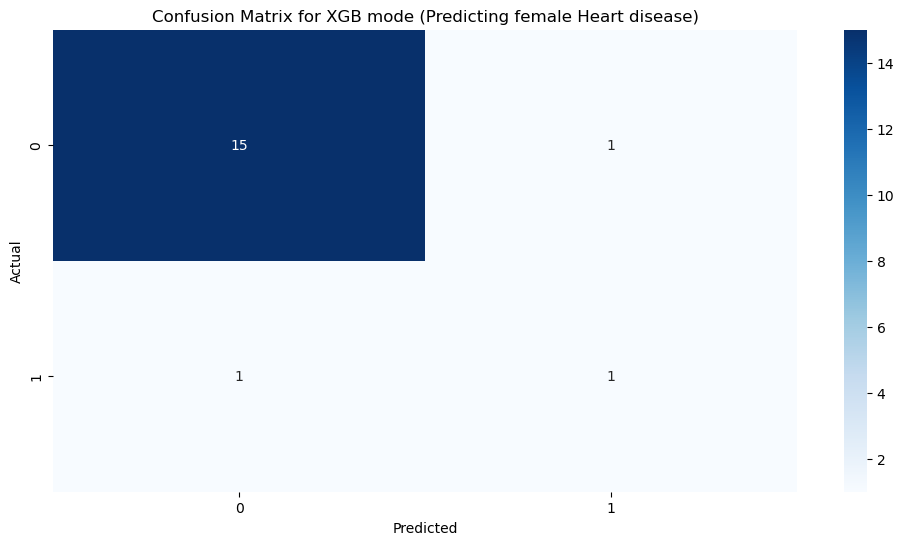

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix_xgb = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (12, 6))
sns.heatmap(conf_matrix_xgb, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix for XGB mode (Predicting female Heart disease)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

lgr_model = LogisticRegression()
lgr_model.fit(X_train_scaled, y_train)

y_lgr_pred = lgr_model.predict(X_test_scaled)

accuracy_lgr = accuracy_score(y_test, y_lgr_pred)
print(accuracy_lgr*100,'%')
precision_lgr = precision_score(y_test, y_lgr_pred)
precision_lgr


83.33333333333334 %


0.3333333333333333

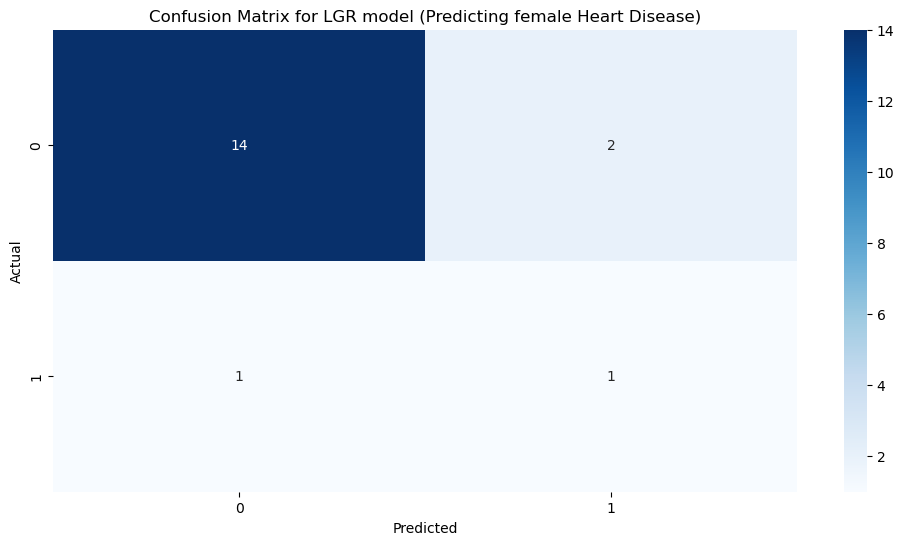

In [15]:

conf_matrix_lgr = confusion_matrix(y_test, y_lgr_pred)

plt.figure(figsize = (12, 6))
sns.heatmap(conf_matrix_lgr, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix for LGR model (Predicting female Heart Disease)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [17]:
from skopt import BayesSearchCV

In [18]:
search_spaces = {"n_estimators": (100, 1000, 10),
                 "max_depth": (3, 10),
                 "learning_rate": (0.01, 0.3),
                 "subsample": (0.5, 1.0),
                 "colsample_bytree": (0.5, 1.0),
                 "gamma": (0, 5),
                 "min_child_weight": (1, 10, 2)}

In [19]:
xgb = XGBClassifier(random_state=42)

opt = BayesSearchCV(estimator=xgb,
                    search_spaces=search_spaces,
                    n_iter=30,
                    scoring = 'precision',
                    cv = 3,
                    random_state=42,
                    n_jobs= -1,
                    verbose=0)

In [20]:
opt.fit(X_train_scaled, y_train)
print(opt.best_params_)

OrderedDict([('colsample_bytree', 0.7224162561505759), ('gamma', 5), ('learning_rate', 0.04040915598028404), ('max_depth', 6), ('min_child_weight', 1), ('n_estimators', 1000), ('subsample', 0.5777240270252717)])


In [21]:
best_model = opt.best_estimator_
y_pred_class = best_model.predict(X_test_scaled)

precision = precision_score(y_test, y_pred_class)
accuracy_xgb = accuracy_score(y_test, y_pred_class)
print(accuracy_xgb)

print(f"Precision Score: {precision:.2f}")

0.9444444444444444
Precision Score: 1.00


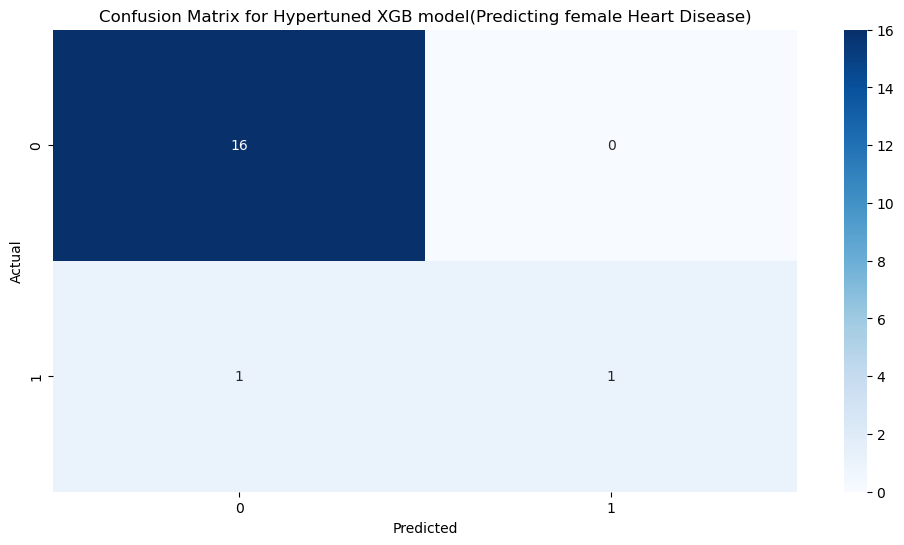

In [23]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize = (12, 6))
sns.heatmap(conf_matrix_lgr, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix for Hypertuned XGB model(Predicting female Heart Disease)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
df.shape

(270, 14)

In [25]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [26]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Heart Disease'] = encoder.fit_transform(df['Heart Disease'])
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [27]:
x = df.drop("Heart Disease", axis=1)
y = df["Heart Disease"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
#scale = StandardScaler()
#X_train = scale.fit_transform(X_train)

from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#X_train = (scaler.fit_transform(X_train)).round()

model_df = XGBClassifier()
model_df.fit(X_train, y_train)
y_pred_df = model_df.predict(X_test)
precision = precision_score(y_test, y_pred_df)

print(f"Precision Score: {precision:.2f}")

Precision Score: 0.79


In [29]:
accuracy_dtc = accuracy_score(y_test, y_pred_df)
print(accuracy_dtc*100,'%')

81.48148148148148 %


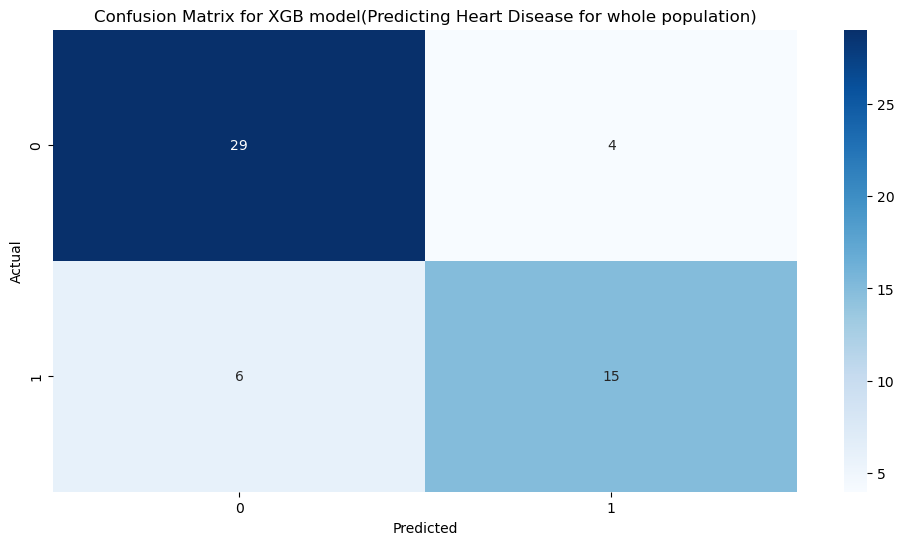

In [31]:
conf_matrix_XGB = confusion_matrix(y_test, y_pred_df)

plt.figure(figsize = (12, 6))
sns.heatmap(conf_matrix_XGB, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix for XGB model(Predicting Heart Disease for whole population)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
search_spaces = {"n_estimators": (100, 1000, 10),
                 "max_depth": (3, 10),
                 "learning_rate": (0.01, 0.3),
                 "subsample": (0.5, 1.0),
                 "colsample_bytree": (0.5, 1.0),
                 "gamma": (0, 5),
                 "min_child_weight": (1, 10, 2)}

In [33]:
xgb = XGBClassifier(random_state=42)

op = BayesSearchCV(estimator=xgb,
                    search_spaces=search_spaces,
                    n_iter=30,
                    scoring = 'precision',
                    cv = 3,
                    random_state=42,
                    n_jobs= -1,
                    verbose=0)

In [34]:
op.fit(X_train, y_train)
print(op.best_params_)

OrderedDict([('colsample_bytree', 0.8592085567241372), ('gamma', 5), ('learning_rate', 0.01), ('max_depth', 7), ('min_child_weight', 10), ('n_estimators', 100), ('subsample', 0.9719793760040978)])


In [35]:
best_model_xg = op.best_estimator_
y_pred_xg = best_model_xg.predict(X_test)

prec_xg = precision_score(y_test, y_pred_xg)
acc_xg = accuracy_score(y_test, y_pred_xg)
print(prec_xg * 100)
print(acc_xg * 100)

83.33333333333334
75.92592592592592


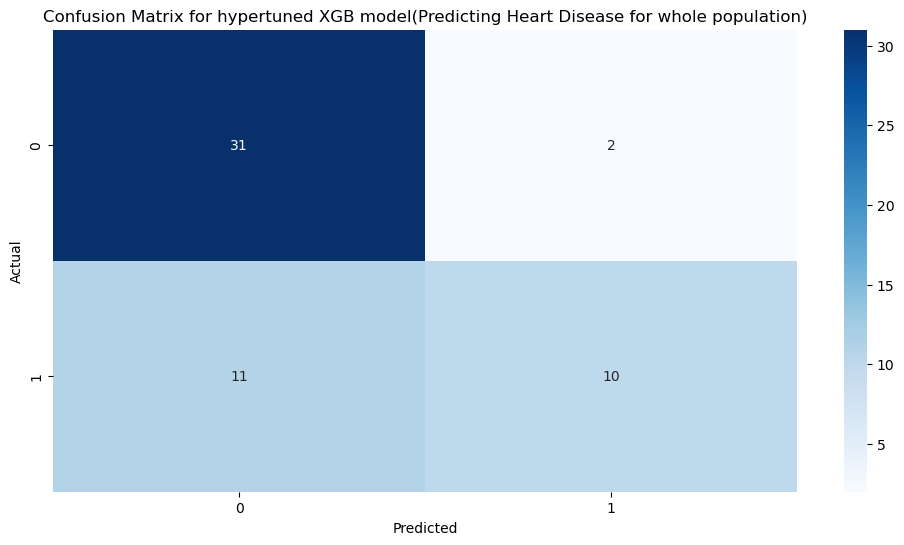

In [37]:
conf_matrix_XGB = confusion_matrix(y_test, y_pred_xg)

plt.figure(figsize = (12, 6))
sns.heatmap(conf_matrix_XGB, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix for hypertuned XGB model(Predicting Heart Disease for whole population)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
# Assuming you're using GridSearchCV or RandomizedSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression model
model = LogisticRegression(random_state=42)

# Define parameters that are valid for LogisticRegression
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Penalty type
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithm to use
    # Remove 'colsample_bytree' as it's not a valid parameter for LogisticRegression
}

# Create the optimizer with valid parameters
opt = GridSearchCV(model, param_grid, cv=5)

# Fit the model
opt.fit(X_train, y_train)
print(opt.best_params_)

C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs fa

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:

In [41]:
opt.fit(X_train, y_train)
print(opt.best_params_)

C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs fa

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Oluba\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


<h1>Best model for predicting </h1>

In [42]:
best_model = opt.best_estimator_
y_pred_lg = best_model.predict(X_test)

precision = precision_score(y_test, y_pred_lg)
accuracy_lg = accuracy_score(y_test, y_pred_lg)
print(accuracy_lg * 100)

print(f"Precision Score: {precision:.2f}")

90.74074074074075
Precision Score: 0.94


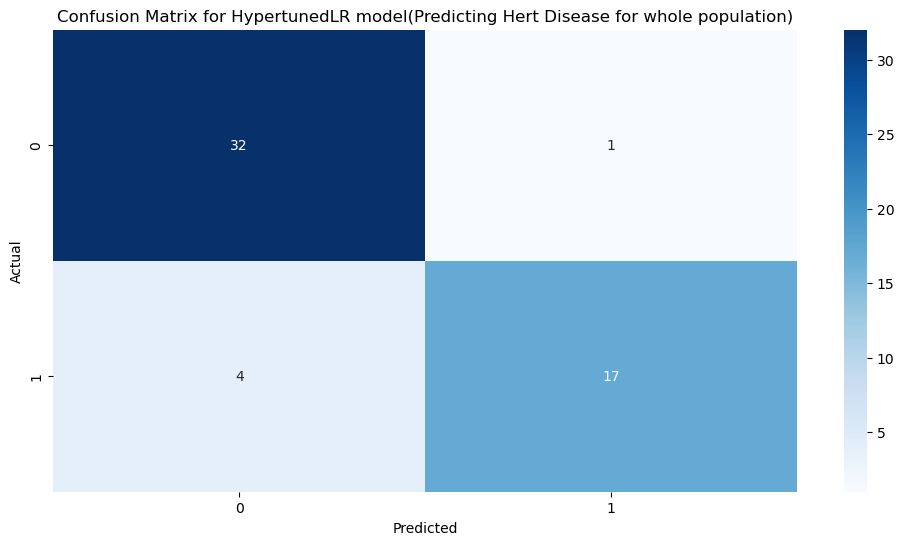

In [43]:
conf_matrix_dtc = confusion_matrix(y_test, y_pred_lg)

plt.figure(figsize = (12, 6))
sns.heatmap(conf_matrix_dtc, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix for HypertunedLR model(Predicting Hert Disease for whole population)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [44]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [45]:
data = {"Age" : 70, "Sex" : 0, "Chest pain type" : 1, "BP" : 120, "Cholesterol" : 200, "FBS over 120" : 0, "EKG results" : 0, "Max HR" : 100,
     "Exercise angina" : 0, "ST depression" : 2.4, "Slope of ST" : 2, "Number of vessels fluro" : 1, "Thallium" : 3 }

In [46]:
m = pd.DataFrame([data])

In [47]:
#Predicting sample for data outside train, test
best_model.predict(m)

array([0])

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

y_rfc_pred = rfc_model.predict(X_test)

precision_rfc = precision_score(y_test, y_rfc_pred)
print(precision_rfc * 100)
accuracy_rfc = accuracy_score(y_test, y_rfc_pred)
print(accuracy_rfc*100,'%')

85.0
87.03703703703704 %


In [50]:
rfc_model.predict(m)

array([0])

In [51]:
# Assistant
# Assuming 'op' is a GridSearchCV or RandomizedSearchCV object with RandomForestClassifier

# Option 1: If you want to keep using RandomForestClassifier, remove the invalid parameter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV  # or RandomizedSearchCV

# Create the classifier
rf = RandomForestClassifier(random_state=42)

# Define valid parameters for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    # Add other valid parameters as needed
}

# Create the optimizer
op = GridSearchCV(rf, param_grid, cv=5)  # or RandomizedSearchCV

# Fit the model
op.fit(X_train, y_train)
print(op.best_params_)

# Option 2: If you specifically need to use 'colsample_bytree', switch to XGBoost
# import xgboost as xgb
# xgb_model = xgb.XGBClassifier(random_state=42)
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [3, 5, 7],
#     'colsample_bytree': [0.7, 0.8, 0.9],
#     # Add other parameters as needed
# }
# op = GridSearchCV(xgb_model, param_grid, cv=5)
# op.fit(X_train, y_train)
# print(op.best_params_)

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


In [52]:
best_model_rf = op.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

prec_rf = precision_score(y_test, y_pred_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(prec_rf * 100)
print(acc_rf * 100)

84.21052631578947
85.18518518518519
